> Proszę omówić złożoność obliczeniową sortowań prostych:

1. Jaka jest złożoność najlepszego i najgorszego przypadku?

2. Ile przypisań i ile porównań wykonuje dany algorytm (jak poprawić sortowanie przez wstawianie?)

3. która z metod wolnych jest stabilna (i co to znaczy, że sortowanie jest stabilne)?

### #1 Najlepsze i najgorsze złożoności prostych sortowań

###### UWAGA 
Wszystkie poniższe algorytmy sortowania mają złożoność pamięciową $ O(1) $

#### Bubble Sort (sortowanie bąbelkowe)

###### Najgorszy przypadek
##### $ O(n^2) $

###### Najlepszy przypadek
##### $ O(n^2) $

#### Selection Sort (sortowanie przez wybieranie)

###### Najgorszy przypadek
##### $ O(n^2) $

###### Najlepszy przypadek
##### $ O(n^2) $

#### Insertion Sort (sortowanie przez wstawianie)

###### Najgorszy przypadek
##### $ O(n^2) $

###### Najlepszy przypadek
##### $ O(n) $
*Algorytm ten osiągnie taką złożoność czasową, jeżeli sekwencja jest posortowana. Wówczas zewnętrzna pętla przejdzie jednorazowo przez sekwencję, sprawdzając tylko, czy dana wartość, znajduje się na dobrej pozycji. Ponieważ sekwencja jest posortowana, każdy element znajduje 
się na właściwej pozycji, więc nie zostanie wykonane żadne przestawienie.
<br><br>
W ogólności, im bardziej sekwencja jest posortowana, tym sortowanie przez proste wstawianie staje się szybsze (bliższe sortowaniu o złożoności liniowej $ O(n) $). Dlatego to sortowanie jest najlepszym sortowaniem spośród najgorszych (tych, których najgorsza złożoność czasowa wynosi $ O(n^2) $).

### #2 a) liczba przypisań porównań

#### Bubble Sort

In [1]:
def bubble_sort(arr):
    for i in range(len(arr)-1):      
        for j in range(len(arr)-1-i):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]

###### Liczba przypisań:

$ n-1 $   - zewnętrzna pętla (tyle razy przypisujemy zmiennej i kolejne wartości z zakresu $ 0, 1, 2, ..., n-2 $)

$ n-1 + n-2 + n-3 + ... + 3 + 2 + 1 = \frac{1 + n-1}{2} \cdot (n-1) = \frac{n}{2} \cdot (n-1) = \frac{1}{2} \cdot n(n-1) $ - wewnętrzna pętla (tyle razy przypisujemy zmiennej j kolejne wartości z zakresu $ 0, 1, 2, ..., n-2-i $) za każdym razem wykonuje o jeden przebieg mniej, bo nie trzeba już sprawdzać wartości, która została odwiedzona jako ostatnia w poprzednim przebiegu - zawsze będzie ona największą wartości spośród poprzednio sprawdzanych)

Pozostaje jeszcze liczba zamian (przypisań) wartości, które są miejscami zamieniane ze sobą (sąsiednie wartości). Jest ona zależna od tego, czy spełniony jest warunek $ arr[j] > arr[j+1] $ i nie da się jej jednoznacznie wyznaczyć (może wynieść $ 0 $, gdy sekwencja jest posortowana lub $ \frac{1}{2} \cdot n(n-1) $, czyli tyle, ile mamy przebiegów wewnętrznej pętli))

###### RAZEM

Minimalnie: $ (n-1) + (\frac{1}{2} \cdot n(n-1)) + 0 = \frac{1}{2} \cdot n^2 + \frac{1}{2} \cdot n - 1 $

Maksymalnie: $ (n-1) + (\frac{1}{2} \cdot n(n-1)) + (\frac{1}{2} \cdot n(n-1)) = (n-1) + n(n-1) = (n-1)(n+1) = n^2 - 1 $

###### Liczba porównań:

$ \frac{1}{2} \cdot n(n-1) $ - zawsze jest ona równa liczbie przebiegów wewnątrznej pętli, ponieważ za każdym razem sprawdzany jest warunek $ arr[j] > arr[j+1] $.

#### Selection Sort

In [2]:
def selection_sort(arr):
    for i in range(len(arr)-1):
        min_idx = i
        for j in range(i+1, len(arr)):
            if arr[j] < arr[min_idx]: min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]

###### Liczba przypisań:

$ n-1 $ - zewnętrzna pętla (analogicznie jak w Bubble Sort)

$ n-1 $ - przypisanie zmiennej $ min\_idx $ wartości $ i $

$ n-1 + n-2 + n-3 + ... + 3 + 2 + 1 = \frac{1}{2} \cdot n(n-1) $ - wewnętrzna pętla (liczba przypisań zmiennej $ j $ kolejnych wartości z zakresu: $ i+1, i+2, i+3, ..., n-1 $)

od $ 0 $ do $ \frac{1}{2} \cdot n(n-1) $ - przypisanie zmiennej $ min\_idx $ wartości zmiennej $ j $ (liczba przypisań zależy od tego, ile razy jest spełniony warunek $ arr[j] < arr[min\_idx] $. Dla posortowanej sekwencji będzie ona wynosiła $ 0 $, ale w najgorszym przypadku może wynieść $ \frac{1}{2} \cdot n(n-1) $, czyli być równa liczbie przebiegów wewnętrznej pętli)

$ 2 \cdot (n-1) $ - zamiana wartości w sekwencji $ (arr[i], arr[min\_idx] = arr[min\_idx], arr[i]) $ (zamianę dokonujemy zawsze, nawet wtedy, gdy nie znaleźliśmy innej mniejszej wartości od tej, która znajduje się pod indeksem $ j $ - nie został ani razu spełniony warunek $ arr[j] < arr[min\_idx] $)

###### RAZEM

Minimalnie: $ 4 \cdot (n-1) + \frac{1}{2} \cdot n(n-1) + 0 = \frac{1}{2} \cdot n^2 + \frac{7}{2} \cdot n - 4 $

Maksymalnie: $ 4 \cdot (n-1) + 2 \cdot \frac{1}{2} \cdot n(n-1) = n^2 + 3n - 4 $

###### Liczba porównań:

$ \frac{1}{2} \cdot n(n-1) $ - jest ona równa liczbie przebiegów wewnątrznej pętli (zawsze wynokujemy jedno porównanie)

#### Insertion Sort

In [3]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        j = i-1
        temp = arr[i]
        
        while j >= 0 and temp < arr[j]:
            arr[j+1] = arr[j]
            j -= 1
        
        arr[j+1] = temp

###### Liczba przypisań:

$ n-1 $ - zewnętrzna pętla (analogicznie jak wcześniej)

$ 2 \cdot (n-1) $ - liczba przypisań zmiennej $ j $ wartości $ i-1 $ oraz liczba przypisań zmiennej temp wartości $ arr[i] $.

od $ 0 $ do $ n(n-1) $ - zależna od tego, jak dalego przesuwamy w lewo daną wartość, znajdującą się pod indeksem $ i $ (jeżeli nie przesuwamy wcale, bo jest większa od wartości pod indeksem $ j=i-1 $, mamy $ 0 $ przypisań, natomiast, w najgorszym przypadku, jeżeli przesuwamy wartość na pierwsze miejsce w sekwencji, mamy $ 2 \cdot i $ przypisań (jedno dla $ arr[j+1] = arr[j] $, a drugie dla $ j = j - 1 $ w każdym spośród $ i $ przebiegów pętli while). Zatem, w najgorszym przypadku, pętla while wykona się łącznie $ 1 + 2 + 3 + ... + n-1 = \frac{1}{2} \cdot n(n-1) $ razy, a więc będzie $ 2 \cdot \frac{1}{2} \cdot n(n-1) = n(n-1) $ przypisań)

$ n-1 $ - liczba przypisań $ arr[j+1] = temp $

###### RAZEM

Minimalnie: $ 4 \cdot (n-1) + 0 = 4n - 4 $

Maksymalnie: $ 4 \cdot (n-1) + 2 \cdot n(n-1) = 2n^2 + 2n - 4 $

###### Liczba porównań:

$ n-1 $ - tyle razy, ile wykonuje się zewnętrzna pętla, tyle razy sprawdzany jest warunek $ j \ge 0 $

od $ 0 $ do $ \frac{1}{2} \cdot n(n-1) $ - tyle razy może zostać sprawdzony warunek $ temp < arr[j] $ (zależy to od tego, jak wcześnie znajdziemy miejsce dla przesuwanej wartości - im wcześniej, tym mniej iteracji). Warunek $ temp < arr[j] $ jest sprawdzany tylko wtedy, gdy spełniony jest warunek $ j \ge 0 $, a więc, dopóki można przesunąć dany element bardziej w lewo. Maksymalnie dla danego $ i $ ten warunek może być sprawdzony $ i $ razy, zatem we wszystkich iteracjach w najgorszym przypadku musimy go sprawdzić $ 1 + 2 + 3 + ... + n-1 = \frac{1}{2} \cdot n(n-1) $ razy.

###### RAZEM

Minimalnie: $ n-1 + 0 = n - 1 $

Maksymalnie: $ n-1 + \frac{1}{2} \cdot n(n-1) = \frac{1}{2} \cdot n^2 + \frac{1}{2} \cdot n - 1 $

### #2 b) poprawiona wersja sortowania przez wstawianie

#### Implementacja funkcji testującej, czy lista jest prawidłowo posortowana
##### (to nie jest częścią zadania)

In [4]:
import random

def test_sort(sorting_fn, *, samples=20):
    passed = 0
    for i in range(samples):
        random_lst = [random.randint(-100, 100) for _ in range(random.randint(5, 15))]
        expected = sorted(random_lst)
        print(f'#{i+1} Loop (already passed: {passed}/{samples})')
        print(f'Before sorting: {random_lst}')
        sorting_fn(random_lst)
        passed += random_lst == expected
        print(f'After sorting: {random_lst}')
        print(f'Expected result: {expected}')
        print()
    print(f'Sorting algorithms is {"correct" if passed == samples else "wrong"}')
    print(f'Passed tests in total: {passed}/{samples}')

#### Przykładowe usprawnienie - przerzucamy wartości większe na prawą stronę, a wartości mniejsze na lewą stronę sekwencji

In [5]:
def insertion_sort(arr):
    if len(arr) < 2: return
    
    # Swap values from the beginning with these from the end
    # if they are greater than these from the end
    for i in range(len(arr) // 2):
        if arr[i] > arr[-i-1]:
            arr[i], arr[-i-1] = arr[-i-1], arr[i]
    
    # Apply a default insertion sort algorithm on the preprocessed sequence
    for i in range(1, len(arr)):
        j = i-1
        temp = arr[i]
        while j >= 0 and arr[j] > temp:
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = temp

###### Kilka testów

In [6]:
test_sort(insertion_sort, samples=100)

#1 Loop (already passed: 0/100)
Before sorting: [72, -76, -18, 89, -36, 37, 45, 37, 19, -26, -2, -61, -2, 23, -56]
After sorting: [-76, -61, -56, -36, -26, -18, -2, -2, 19, 23, 37, 37, 45, 72, 89]
Expected result: [-76, -61, -56, -36, -26, -18, -2, -2, 19, 23, 37, 37, 45, 72, 89]

#2 Loop (already passed: 1/100)
Before sorting: [10, 24, 30, 33, -31, -56, 93, -98, -42, 62]
After sorting: [-98, -56, -42, -31, 10, 24, 30, 33, 62, 93]
Expected result: [-98, -56, -42, -31, 10, 24, 30, 33, 62, 93]

#3 Loop (already passed: 2/100)
Before sorting: [57, 66, 63, -42, 75]
After sorting: [-42, 57, 63, 66, 75]
Expected result: [-42, 57, 63, 66, 75]

#4 Loop (already passed: 3/100)
Before sorting: [-14, 70, 82, -38, 35, -88, 24]
After sorting: [-88, -38, -14, 24, 35, 70, 82]
Expected result: [-88, -38, -14, 24, 35, 70, 82]

#5 Loop (already passed: 4/100)
Before sorting: [-3, -7, -52, -33, 23, 96, -34, -88, 84, 25, 82, 88, 96]
After sorting: [-88, -52, -34, -33, -7, -3, 23, 25, 82, 84, 88, 96, 96]
E

### #3 Stabliność sortowań prostych

Sortowanie nazywamy stabilnym, jeżeli wzajemna kolejność elementów o tych samych kluczach pozostaje niezmieniona wskutek sortowania. Np. jeżeli sortujemy obiekty, które przechowują różne dane (np. instancje klasy, słowniki, listy), możemy je posortować na różne sposoby, np. według ich długości (np. listy/słowniki), pewnej wartości atrybutu (instancje klasy), itp. Wówczas istotne może się okazać to, że elementy sortowane, które mają tę samą długość/klucz/atrybut/itp. mają pozostać w niezmienionej kolejności względem siebie. Wtedy konieczne jest użycie stabilnego algorytmu sortowania.

#### Bubble Sort

###### Stabilny

Ponieważ wykonujemy zamiany sąsiednych wartości tylko wtedy, gdy jedna jest większa od drugiej. Kolejność żadnych dwóch elementów o tych samych kluczach, według których sortujemy daną sekwencję, nie zostanie zmieniona, ponieważ zamieniamy tylko te elementy, których klucze są różne, a klucz tego, który znajduje się wcześniej, jest większy od klucza tego, który znajduje się później (przy sortowaniu w kolejności malejącej, postępujemy odwrotnie)

#### Insertion Sort

###### Stabilny

Wynika to stąd, że dany element, który jest mniejszy od poprzedniego (przy sortowaniu w kolejności malejącej - większy od poprzedniego) przesuwamy w lewo, dopóki jest on mniejszy (większy) od elementu, który go w danym momencie poprzedza. Dlatego, jeżeli zdarzy się kilka elementów, które mają ten sam klucz, według którego przeprowadzamy sortowanie, przesuwany element wstawiony zostanie za ostatnim elementem, ktorego klucz jest taki sam jak klucz elementu, który przemieszczamy, więc nie istnieje możliwość wzajemnej zmiany kolejności elementów, które posiadają ten sam klucz.

#### Selection Sort

###### Niestabilny

Wynika to stąd, że w każdym przebiegu wewnętrznej pętli, poszukujemy elementu, którgo klucz jest w danym momencie najmniejszy (największy - przy sortowaniu w kolejności malejącej) spośród kluczy elementów, znajdujących się w sprawdzanej w drugiej pętli elementów. Ponieważ sprawdzamy tylko te elementy sekwencji, które znajdują się dalej od elementu, na którym w danym momencie "zatrzymała" się zewnętrzna pętla oraz poszukujemy elementu najmniejszego spośród sprawdzanych, istnieje możliwość, że wskutek zamiany elementu najmniejszego z elementem z zewnętrznej pętli, element z zewnętrznej pętli znajdzie się dalej niż inny element, który posiada ten sam klucz. Wynika stąd, że wzajemna odległość elementów, które posiadają te same klucze, może zostać (i zazwyczaj jest) zmieniona.

###### Przykład
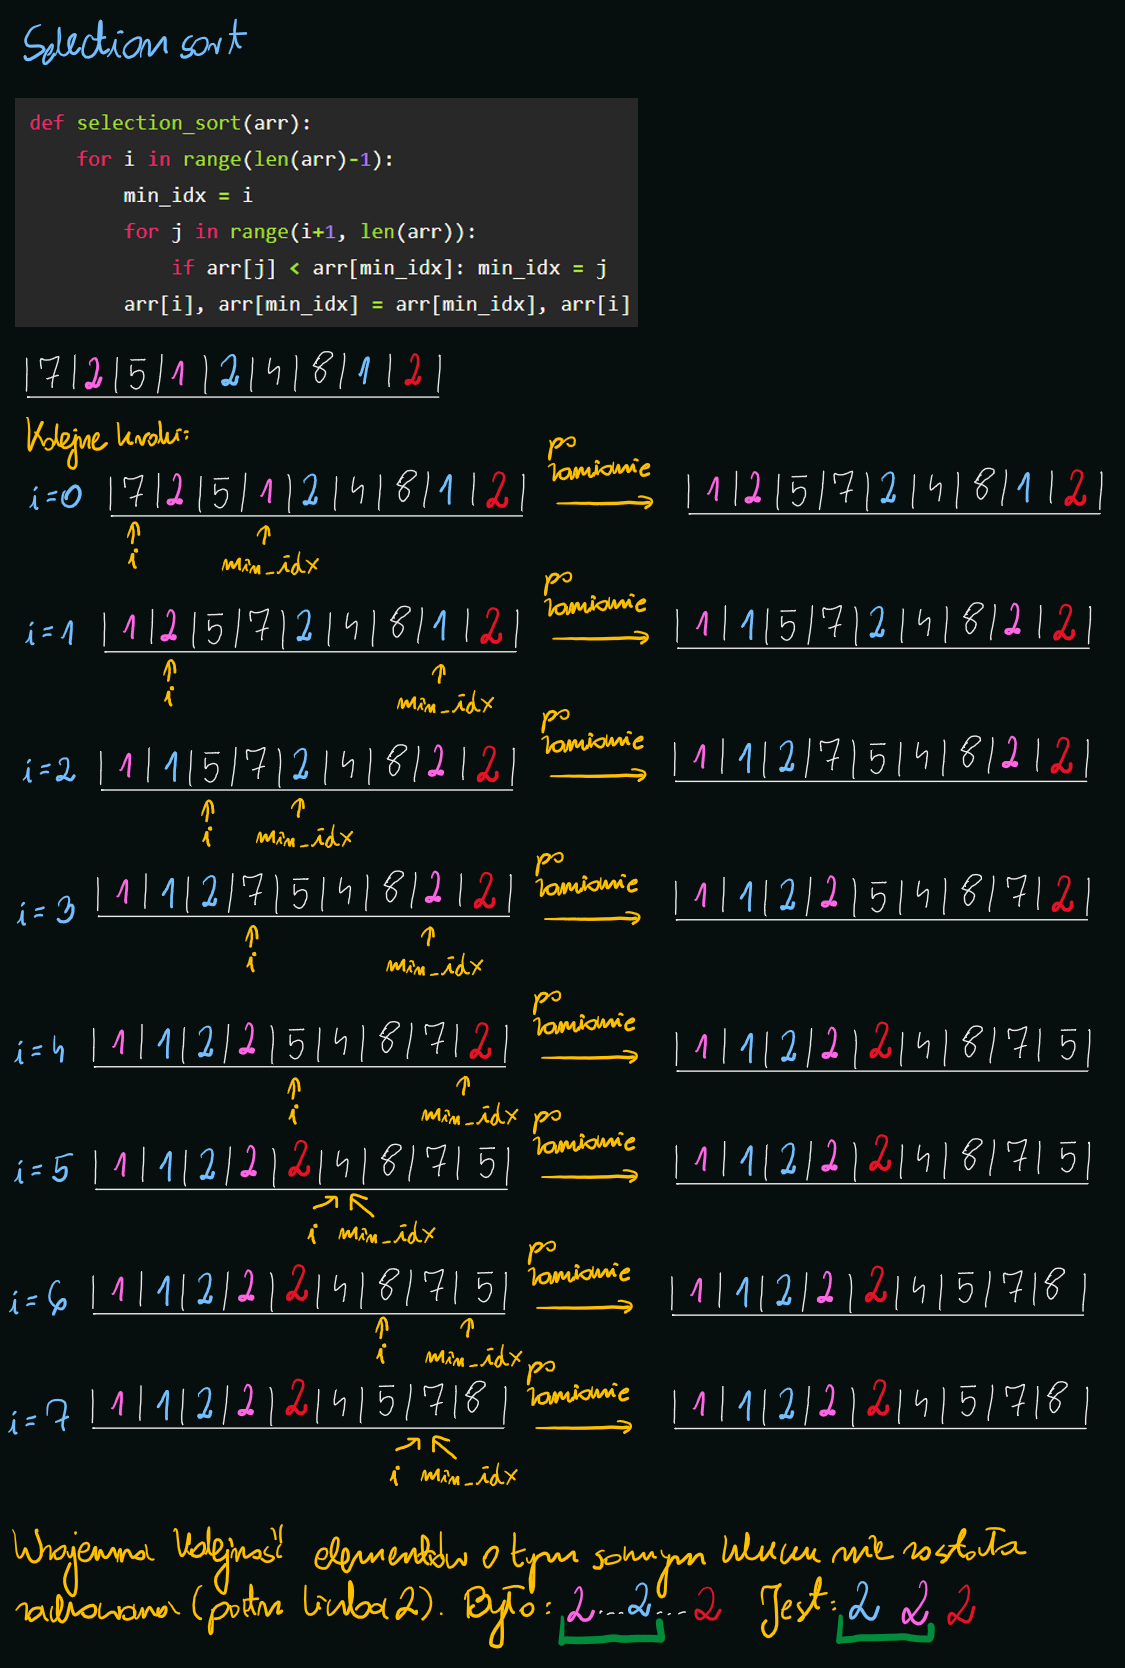

Jeszcze jeden przykład (poniżej implementacja funkcji, która koloruje wartości, aby pokazać ich wzajemną kolejność):

In [7]:
import random
from colorama import Fore, Style
from collections import defaultdict

def random_lst(length, to_choose):
    return [random.choice(to_choose) for _ in range(length)]

def colorized_val(val, color_name):
    return f'{getattr(Fore, color_name)}{val}{Style.RESET_ALL}'

def colorize_list(lst):
    counts = defaultdict(int)
    color_names = list(filter(lambda attr: not attr.startswith('__') and 'BLACK' not in attr, dir(Fore)))
    color_names.remove('WHITE')
    color_names.insert(0, 'WHITE')
    for i, val in enumerate(lst):
        counts[val] += 1
        # Repaint the value if there is already the same value as val in the list
        if counts[val] == 2:
            idx = lst.index(colorized_val(val, color_names[0]))
            lst[idx] = colorized_val(val, color_names[-1])
        color = color_names[(counts[val]-1) % len(color_names)]
        lst[i] = colorized_val(val, color)

def to_int(val):
    return int(val[5:-4])

In [8]:
def selection_sort(arr):
    for i in range(len(arr)-1):
        min_idx = i
        for j in range(i+1, len(arr)):
            if to_int(arr[j]) < to_int(arr[min_idx]): min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
#         print(*arr)

In [9]:
lst = [7, 2, 5, 1, 2, 4, 8, 1, 2]
colorize_list(lst)
print('This example is the same as above:')
print(*lst)
selection_sort(lst)
print(*lst)
print()

print('Look at the same values which have different colors. Sometimes they don\'t remain in the initial order.')
for _ in range(20):
    lst = random_lst(10, range(10))
    colorize_list(lst)
    print('Before sorting:', ' '.join(lst))
    selection_sort(lst)
    print('After sorting:', ' '.join(lst))
    print()

This example is the same as above:
7 2 5 1 2 4 8 1 2
1 1 2 2 2 4 5 7 8

Look at the same values which have different colors. Sometimes they don't remain in the initial order.
Before sorting: 6 0 6 4 7 0 1 7 7 8
After sorting: 0 0 1 4 6 6 7 7 7 8

Before sorting: 3 1 7 2 0 8 8 0 2 6
After sorting: 0 0 1 2 2 3 6 7 8 8

Before sorting: 2 8 3 5 9 4 5 8 2 5
After sorting: 2 2 3 4 5 5 5 8 8 9

Before sorting: 7 7 5 4 8 0 0 1 0 6
After sorting: 0 0 0 1 4 5 6 7 7 8

Before sorting: 2 7 6 3 0 2 9 7 7 2
After sorting: 0 2 2 2 3 6 7 7 7 9

Before sorting: 8 5 1 3 3 7 9 6 8 1
After sorting: 1 1 3 3 5 6 7 8 8 9

Before sorting: 2 9 7 7 6 1 4 7 9 2
After sorting: 1 2 2 4 6 7 7 7 9 9

Before sorting: 1 0 8 9 8 2 1 9 2 6
After sorting: 0 1 1 2 2 6 8 8 9 9

Before sorting: 8 8 9 4 9 2 4 0 7 4
After sorting: 0 2 4 4 4 7 8 8 9 9

Before sorting: 4 8 6 4 6 9 1 0 6 5
After sorting: 0 1 4 4 5 6 6 6 8 9

Before sorting: 8 3 7 1 6 4 0 5 8 1
After sorting: 0 1 1 3 4 5 6 7 8 8

Before sorting: 6 4 1 3 8 2 7 8 5